In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

dirbase='/content/drive/My Drive/Colab Notebooks/final/CORD-19-research-challenge/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=open('/content/drive/My Drive/Colab Notebooks/final/preprocessed_dataframe_withabs.pkl','rb')

In [0]:

import pickle
import pandas as pd
import numpy as np

In [0]:
data3=pickle.load(df)

In [5]:
pd.DataFrame(data3).head()

,paper_id,abstract,body_text,authors,title,journal,abs_embeddings
0,8f8eb4f004c2002face0723f2f58cc411954d36e,bordetella bronchiseptica isolate km22 has bee...,20 kb insert library preparation protocol htt...,"['Nicholson, Tracy L.', 'Bayles, Darrell O.', ...",Complete Genome Sequence of Bordetella bronchi...,Microbiol Resour Announc,"[0.5611718, -1.6055164, -0.3015707, 1.3656353,..."
1,63f7049d200896290b38b38711113054f7ea1b50,,i nfectious diseases have been an ever present...,"['Fauci, Anthony S.', 'Touchette, Nancy A.', '...",Emerging Infectious Diseases: a 10-Year Perspe...,Emerg Infect Dis,"[0.08515295, 1.3735111, -1.4646378, 1.0543978,..."
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,the influenza a nucleoprotein np is an attra...,the transmission of a pathogenic avian h5n1 vi...,"['Cheung, Ying-Kit', 'Cheng, Samuel Chak-Sum',...",Two novel HLA-A*0201 T-cell epitopes in avian ...,Vet Res,"[0.47866186, -0.6638255, 0.1754263, 1.1533322,..."
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,the outbreak of severe acute respiratory syndr...,acute lung injury inflammatory response neut...,"['Han, Bing', 'Ma, Xuezhong', 'Zhang, Jianhua'...",Protective Effects of Long Pentraxin PTX3 on L...,Lab Invest,"[0.50645465, -0.9080116, 0.25641692, 1.5408603..."
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,the prevalence of feline herpesvirus 1 fhv 1 ...,feline herpesvirus type 1 fhv 1 is the most ...,"['Kang, Byeong-Teck', 'Park, Hee-Myung']","Prevalence of feline herpesvirus 1, feline cal...",J Vet Sci,"[0.23942186, -1.5093378, 0.37435517, 1.2700759..."


##UMAP

In [6]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-cp36-none-any.whl size=3569 sha256=761e10209e09e273923772282736251197463c9c1fc8f1a747c0eb7501961faf
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [7]:
pip install matplotlib

In [0]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [0]:
reducer = umap.UMAP(n_neighbors = 5)

In [0]:
#len(data3['abs_embeddings'])

In [0]:
#c=np.r_[data3['abs_embeddings'][0],data3['abs_embeddings'][0]]
#d=np.row_stack((data3['abs_embeddings'][0],data3['abs_embeddings'][0]))
#d

In [0]:
numpy_array=data3['abs_embeddings'][0]
for i in range(1,len(data3['abs_embeddings'])):
  numpy_array=np.row_stack((numpy_array,data3['abs_embeddings'][i]))


In [0]:
numpy_array

array([[ 5.6117183e-01, -1.6055164e+00, -3.0157071e-01, ...,
        -2.7205265e-01, -3.4717625e-01, -8.6908382e-01],
       [ 8.5152946e-02,  1.3735111e+00, -1.4646378e+00, ...,
         5.9260428e-04, -5.4621434e-01,  6.7162395e-01],
       [ 4.7866186e-01, -6.6382551e-01,  1.7542630e-01, ...,
        -1.7128816e+00,  4.6163672e-01, -1.6633127e+00],
       ...,
       [ 2.4256085e-01, -1.1034224e+00, -1.9834979e-01, ...,
        -8.3443832e-01, -1.4726093e-01, -1.5668550e+00],
       [ 1.7423182e+00, -4.6862429e-01,  4.7854683e-01, ...,
        -1.2612069e+00, -8.6767775e-01, -3.8315815e-01],
       [-4.6492535e-01, -1.3603466e+00,  6.2049377e-01, ...,
        -4.8736814e-01, -6.9973683e-01, -1.3750312e+00]], dtype=float32)

In [0]:
#array=reducer.fit_transform(np.asmatrix(numpy_array))
#array

[[ 1.7196664  7.2444777]
 [19.249113   5.369575 ]
 [ 8.565183   5.6118007]
 ...
 [ 3.4571362  4.7749944]
 [ 6.7091823  2.3971195]
 [ 3.6651814  5.6461363]]


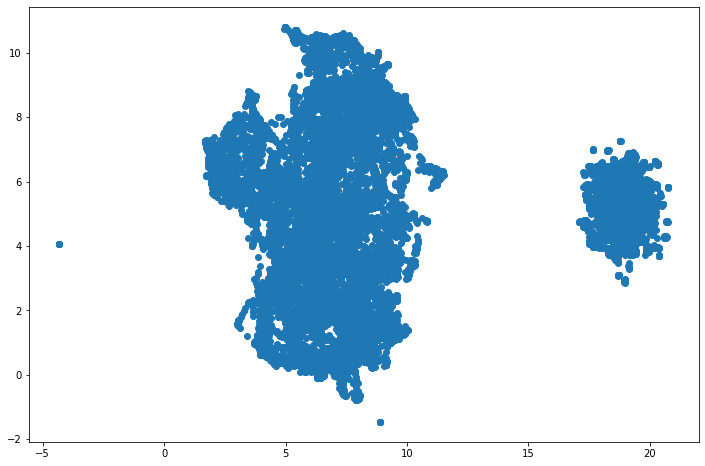

In [13]:
clusterable_embedding = reducer.fit_transform(np.asmatrix(numpy_array))
#or cluster text body
plt.figure(figsize=(12,8))
plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1])
clusterable_embedding.shape
print(clusterable_embedding)

In [14]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361297 sha256=f4b30fd7f4919d67aa2dfd2cb8901863e73d025c2bda1cff505777fd0905f5c9
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [15]:
import hdbscan
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer=clusterer.fit(clusterable_embedding)

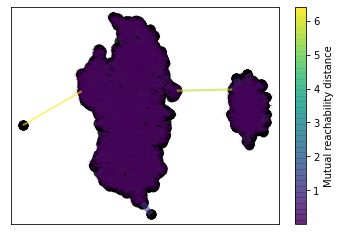

In [17]:
#Build the minimum spanning tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

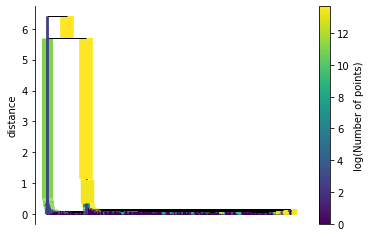

In [18]:
#Build the cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

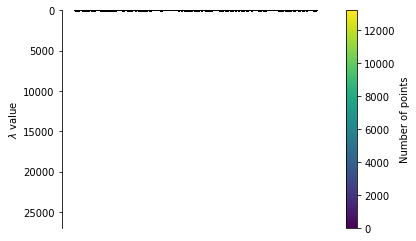

In [19]:
#Condense the cluster tree
clusterer.condensed_tree_.plot()

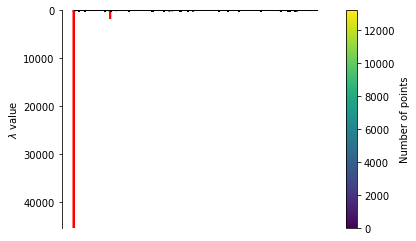

In [0]:
#Extract the clusters
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [20]:
clusterer.labels_

array([ 530,  337,  390, ...,  473, 1890,  249])

In [21]:
len(clusterer.labels_)

13202

In [22]:
max(clusterer.labels_)

1891

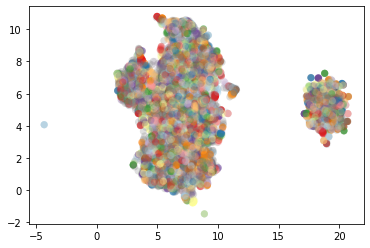

In [23]:
#clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(clusterable_embedding)
color_palette = sns.color_palette('Paired',max(clusterer.labels_))
cluster_colors = [color_palette[x] if x >= 0 and x<max(clusterer.labels_)
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                        zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*clusterable_embedding.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [0]:
data3['cluster_']=clusterer.labels_

In [0]:
#grouped=data3.groupby(data3['cluster_'])
#for gp_name, gp in grouped:
#    display(gp)

##KMeans

In [0]:
from sklearn.cluster import KMeans

In [0]:
#kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(clusterable_embedding)
#kmeans

In [0]:
#plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1], c=kmeans, cmap='rainbow')

In [0]:
kmeans_clustering_model=KMeans(n_clusters=6, random_state=0)
kmeans_clustering_model.fit(clusterable_embedding)
kmeans_label=kmeans_clustering_model.labels_

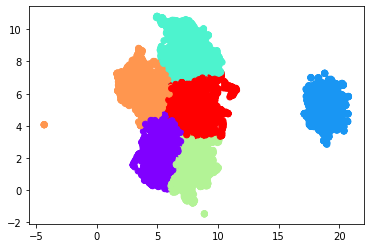

In [37]:
plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1], c=kmeans, cmap='rainbow')

LDA

In [0]:
from sklearn.decomposition import  LatentDirichletAllocation

In [0]:
def test_lda_negative_input():

    # test pass dense matrix with sparse negative input.
  X = -np.ones((5, 10))
  lda = LatentDirichletAllocation()
  regex = r"^Negative values in data passed"
  assert_raises_regexp(ValueError, regex, lda.fit, X)

In [47]:
no_topics = 15
lda = LatentDirichletAllocation(n_components=no_topics).fit(clusterable_embedding) # not sure whether work

ValueError: ignored

In [0]:
#extract topics
def display_topics(model, feature_names, no_top_words):
    topics=[]
    for topic_idx, topic in enumerate(model.components_):
        #print ("Topic %d:" % (topic_idx))
        topic_words=" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        #print(topic_words)
        topics.append(topic_words)
    return topics

In [0]:
no_top_words = 5

#print("\nLDA: ")
#feature_name=
topics_lda=display_topics(lda, feature_name, no_top_words)  #get feature name from first

#print(topics_lda)

In [0]:
pred_lda=lda.transform(body_text_encode)

res_lda=[topics_lda[np.argmax(r)] for r in pred_lda]
df_covid['topic_lda']=res_lda

In [0]:
df_covid['topic_lda'][0:10]